Lista wszystkich miast:
1 - Warszawa
2 - Gdynia
3 - Szczecin
4 - Toruń
5 - Lublin
6 - Wrocław
7 - Częstochowa
8 - Rzeszów
9 - Gdańsk
10 - Olsztyn
11 - Lwów
12 - Sosnowiec
13 - Katowice
14 - Kielce
15 - Zabrze
16 - Brno
17 - Bydgoszcz
18 - Gliwice
19 - Królewiec
20 - Kraków
21 - Bytom
22 - Radom
23 - Poznań
24 - Łódź
25 - Praga
26 - Brześć
27 - Grodno
28 - Ostrawa
29 - Bielsko-Biała
Podaj miasto poczatkowe: 
Podaj miasto docelowe: 
Twoja podróż odbędzie się przez miasta:
1 - Lublin
2 - Warszawa - port pośredni
3 - Lwów
Czasy poszczególnych przejazdów:
('Warszawa', 'Lublin') czas przejazdu: 3.2
('Warszawa', 'Lwów') czas przejazdu: 12.0


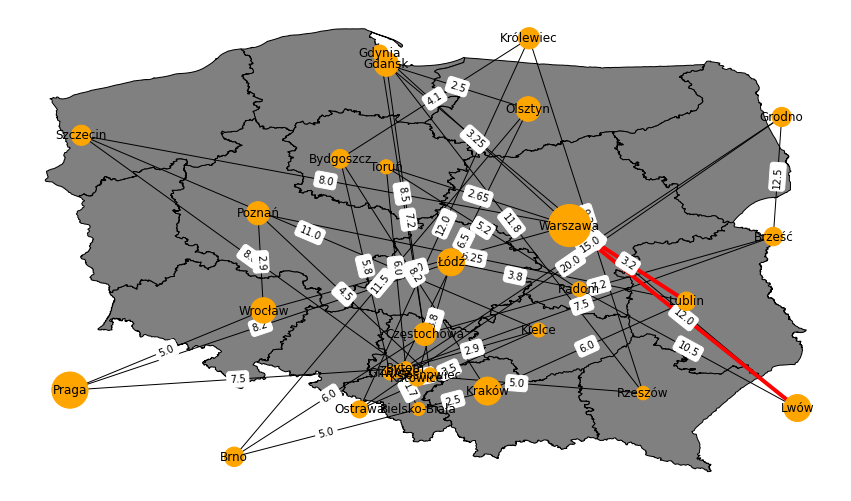

In [67]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# mapa Polski została pobrana ze strony:
# http://www.gugik.gov.pl/pzgik/dane-bez-oplat/dane-z-panstwowego-rejestru-granic-i-powierzchni-jednostek-podzialow-terytorialnych-kraju-prg

# współrzędne geograficzne dla poszczególnych miast zostały wyszukane i spisane dzięki Google Maps

# lista z liczbą ludności (wielkość miast) została sporządzona bazując na danych z Wikipedii

# lista czasów przejazdu została wyznaczona na podstawie danych z google maps -> transport publiczny -> brane pod uwagę były najkrótsze możliwe przejazdy
# w kilku pozycjach czas przejazdu został wyznaczony na podstawie jazdy samochodem, gdyż w niektórych przypadkach google maps nie udostępnia czasu dojazdu transportem publicznym

m = gpd.read_file('mapa_pl/Województwa.shp')
m.plot(figsize=(15,17),
    edgecolors="black",
    color="grey")
czas= pd.read_csv('polaczenia.csv')
dane = pd.read_csv('miasta.csv')
# df = nx.from_pandas_edgelist(czas, source='city', target='destination', edge_attr=True)
gg = list(zip(czas['city'],czas['destination'],czas['drive_time']))
G2 = nx.Graph()
G2.add_weighted_edges_from(gg)
xy = list(zip(dane['y'],dane['x']))
p = list(dane['miasto'])
node_sizes = list(dane['wielkosc'])
# skalujemy powierzchnię braną na podstawie liczby ludności
for index, value in enumerate(node_sizes):
    node_sizes[index] = value / 1000

wagi = [i['weight'] for i in G2.edges.values()]
awe=nx.get_edge_attributes(G2,'weight')
pos = {i:j for i,j in zip(p,xy)}
# node_sizes = []
# node_size_custom = 0
# for n in p:
#     node_sizes.append(node_size_custom)
#     node_size_custom = node_size_custom + 100
nx.draw(G2, pos,
         node_shape='o',
         node_size=node_sizes,
         # edge_color=colors,
         node_color="orange",
         arrows=False,
         weight_size=45,
         with_labels=True)
nx.draw_networkx_edge_labels(G2,pos, edge_labels=awe)
# plt.show()
print ("Lista wszystkich miast:")
for i, v in enumerate(p):
     print (i+1, "-" ,v)

print('Podaj miasto poczatkowe: ')
miasto_poczatkowe = input()
print('Podaj miasto docelowe: ')
miasto_docelowe = input()

if not nx.has_path(G2, miasto_poczatkowe, miasto_docelowe):
    print('W zaden sposob nie da sie dotrzec z ' + miasto_poczatkowe + ' do ' + miasto_docelowe + '!')
else:
    # szukanie najkrotszego polaczenia
    sciezka = nx.shortest_path(G2, source=miasto_poczatkowe, target=miasto_docelowe, weight='drive_time')
    krawedz_sciezki = list(zip(sciezka, sciezka[1:]))

    # plt.figure(figsize=(15,15))
    # nx.draw(df,pos,
    #         node_shape='s',
    #         node_size=1000,
    #         with_labels=True,
    #         node_list=sciezka)
    nx.draw_networkx_edges(G2,pos,
                           edge_color='red',
                           width=4,
                           edgelist=krawedz_sciezki)

    print("Twoja podróż odbędzie się przez miasta:")
    for index, value in enumerate(sciezka):
        if 0 < index < len(sciezka) - 1:
            print(index + 1, "-", value, "- port pośredni")
        else:
            print(index + 1, "-", value)

    print("Czasy poszczególnych przejazdów:")
    for index, value in enumerate(krawedz_sciezki):
        for index2, value2 in enumerate(awe):
            if value2 == value or (value[1] == value2[0] and value[0] == value2[1]):
                print(value2, "czas przejazdu:", wagi[index2])